In [26]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import itertools
import seaborn as sns

In [3]:
wine=pd.read_csv("C:\\Users\\Dell\\Downloads\\wine.csv")

In [4]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
#Normalise the numeric data
wine_normal=scale(wine)

In [7]:
pca = PCA(n_components = 6)
pca_values = pca.fit_transform(wine_normal)

In [36]:
#The Amount of variance that each PCA explain is

In [9]:
var = pca.explained_variance_ratio_
var
pca.components_[0]

array([ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
       -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
        0.08931829, -0.27682265, -0.35052618, -0.26951525])

In [41]:
#Cumulative Variance

In [10]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 ])

In [45]:
#variance plot for PCA components obtained

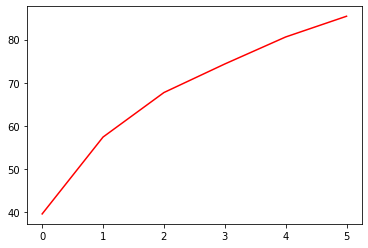

In [11]:
plt.plot(var1,color="red")

In [12]:
#Plot beetween PCA1 and PCA2

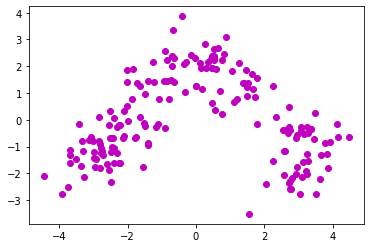

In [13]:
x = pca_values[:,0]
y = pca_values[:,1]
plt.scatter(x,y,color=["m"])

In [53]:
#Performing Clustering

In [14]:
new_df = pd.DataFrame(pca_values[:,0:4])

In [15]:
new_df

,0,1,2,3
0,-3.522934,-1.453098,-0.164795,-0.013273
1,-2.528858,0.330019,-2.026707,-0.417144
2,-2.785029,-1.036936,0.983238,0.664232
3,-3.922588,-2.768210,-0.174968,0.565088
4,-1.407511,-0.867773,2.025829,-0.440906
...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705
174,2.942729,-1.752263,0.207480,0.399381
175,3.027272,-2.756040,-0.940803,0.607758
176,2.755222,-2.293784,-0.550474,-0.391570


In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(new_df)
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [17]:
clusters = kmeans.fit_predict(pca_values[:,:3])

In [18]:
cluster_df = pd.DataFrame(pca_values[:,:3])
cluster_df = cluster_df.rename(columns = {0: 'PC1', 1: 'PC2', 2: 'PC3'})

['PC1', 'PC2']


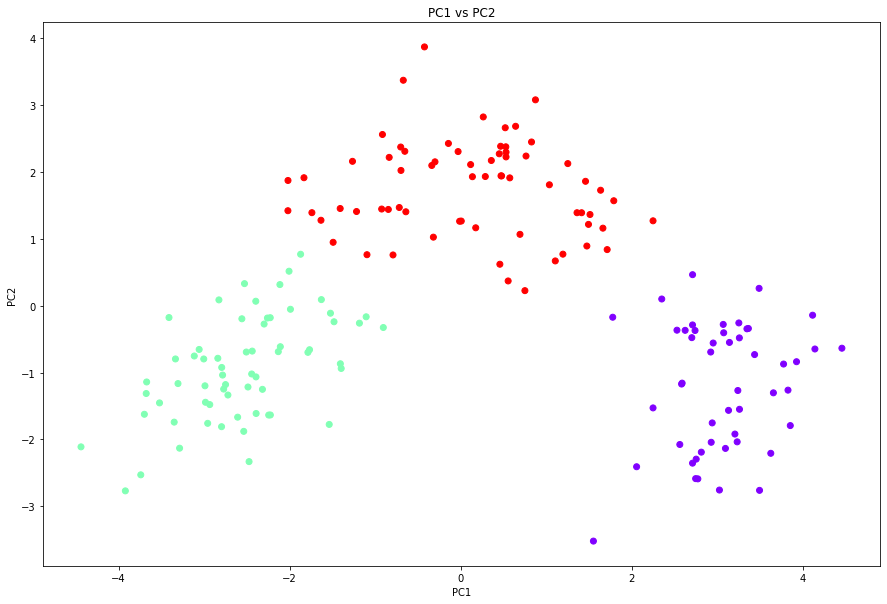

['PC1', 'PC3']


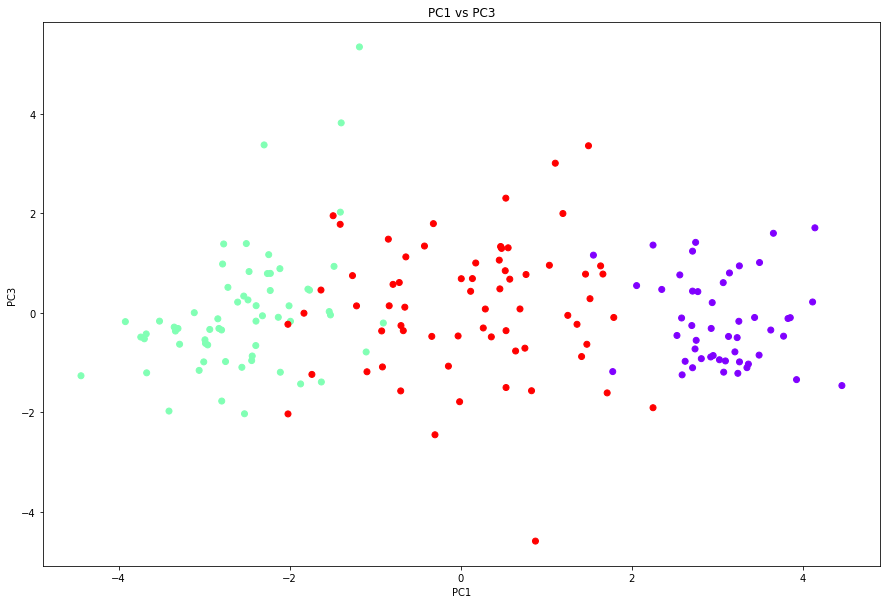

['PC2', 'PC3']


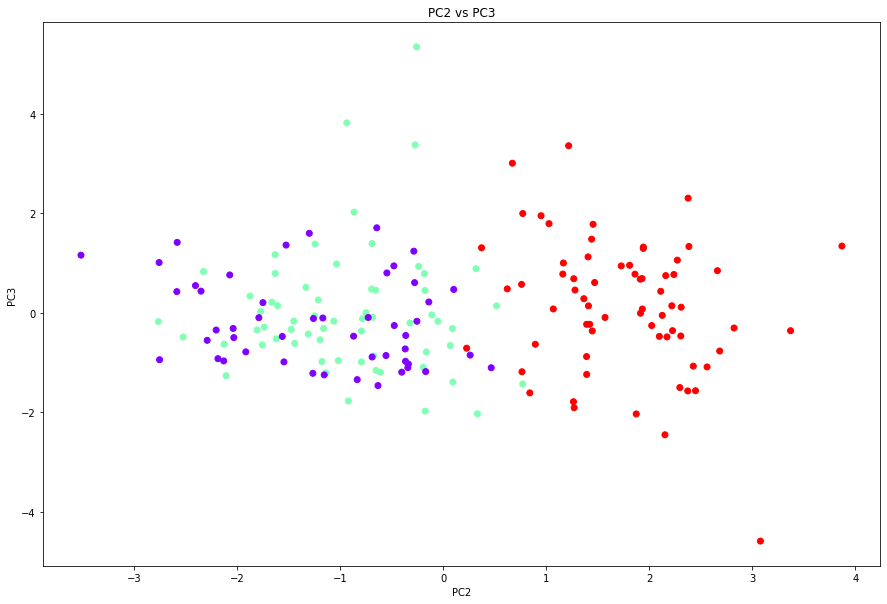

In [21]:
for i in itertools.combinations(cluster_df.columns,2):
    comb = list(i)
    print(comb)
    fig = plt.subplots(figsize = (15,10))
    plt.scatter(cluster_df[comb[0]], cluster_df[comb[1]] , c = clusters , cmap = 'rainbow')
    plt.xlabel(comb[0])
    plt.ylabel(comb[1])
    plt.title(comb[0] + ' ' + 'vs' + ' ' + comb[1])
    plt.show()

In [23]:
#Hierarchical clustering

In [24]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

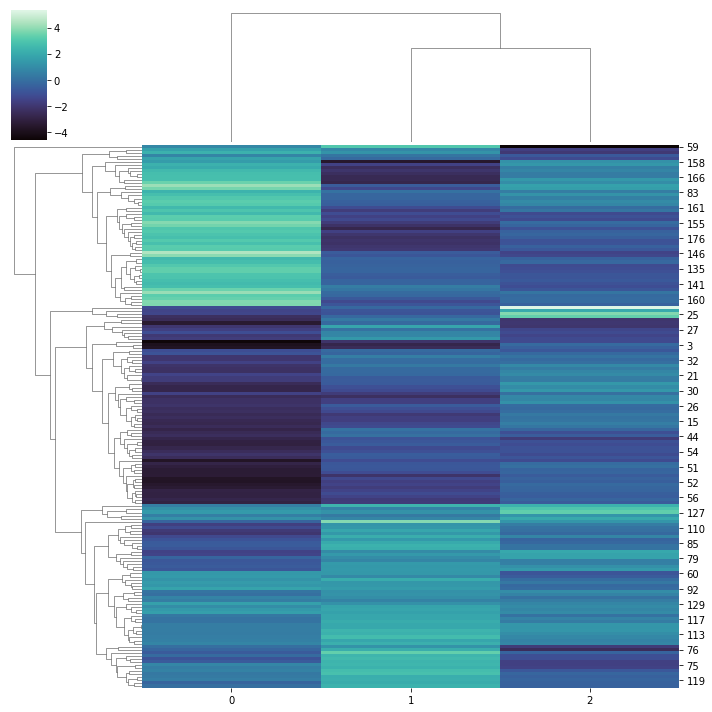

In [28]:
sns.clustermap(pca_values[:,:3], cmap = 'mako')

In [30]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

In [32]:
y_hc = hc.fit_predict(pca_values[:,:3])

['PC1', 'PC2']


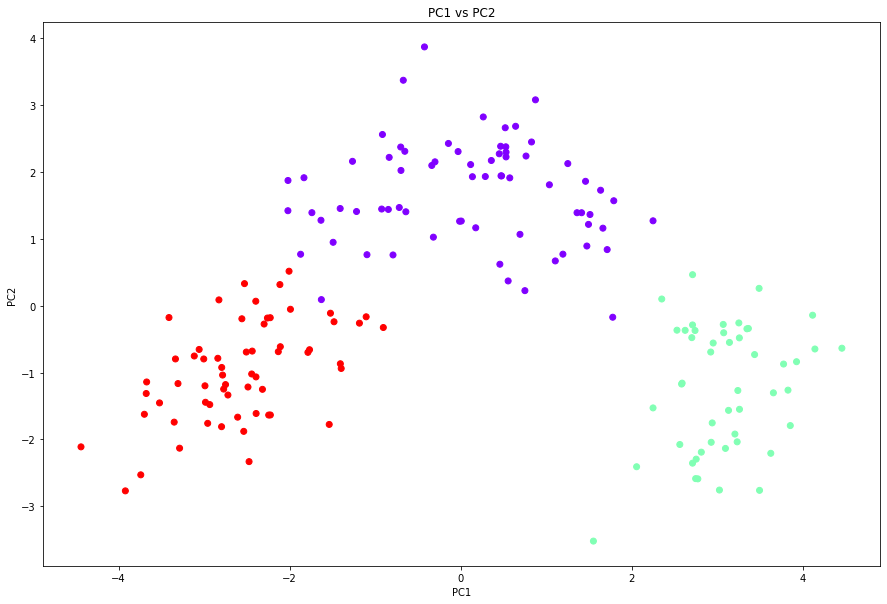

['PC1', 'PC3']


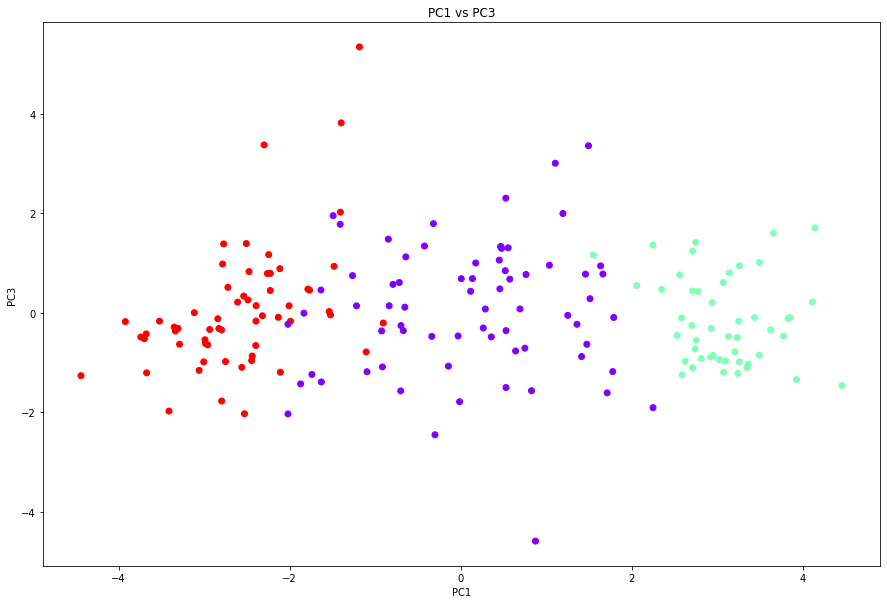

['PC2', 'PC3']


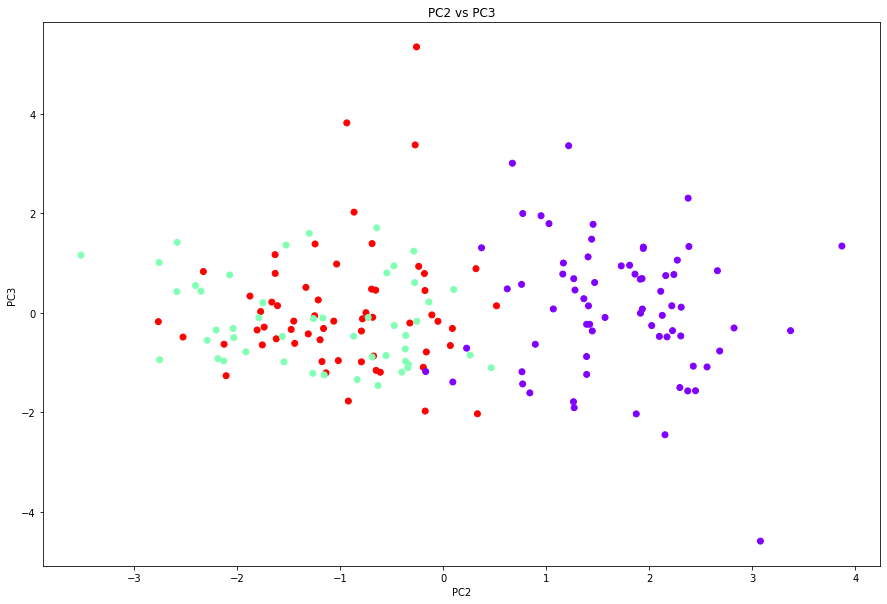

In [34]:
for i in itertools.combinations(cluster_df.columns,2):
    comb = list(i)
    print(comb)
    fig = plt.subplots(figsize = (15,10))
    plt.scatter(cluster_df[comb[0]], cluster_df[comb[1]] , c = y_hc , cmap = 'rainbow')
    plt.xlabel(comb[0])
    plt.ylabel(comb[1])
    plt.title(comb[0] + ' ' + 'vs' + ' ' + comb[1])
    plt.show()

In [35]:
classification_df_hc = pd.DataFrame()
classification_df_hc['Actual Type'] = wine['Type']
classification_df_hc['Identified Clusters'] = y_hc
classification_df_hc

,Actual Type,Identified Clusters
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2
...,...,...
173,3,1
174,3,1
175,3,1
176,3,1
